In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [16]:
digits = load_digits()

In [17]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [18]:
X, y = digits.data, digits.target

In [19]:
X.shape

(1797, 64)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9861111111111112


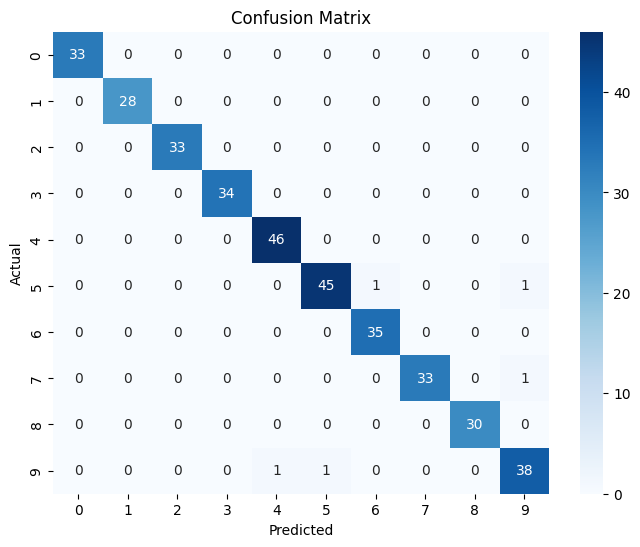

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
#lets try different values of k

k_values = [1, 3, 5, 7, 9, 11]
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    scores = cross_val_score(model, X, y, cv=5)
    print(f"k={k}, Mean Accuracy: {scores.mean():.4f}")

k=1, Mean Accuracy: 0.9644
k=3, Mean Accuracy: 0.9666
k=5, Mean Accuracy: 0.9627
k=7, Mean Accuracy: 0.9599
k=9, Mean Accuracy: 0.9566
k=11, Mean Accuracy: 0.9555
